In [386]:
# Data manipulation
import pandas as pd
import numpy as np

In [387]:
# More Data Preprocessing & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [388]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [389]:
la_df = pd.read_csv("/Users/apple/Desktop/Real_projects/Air_bnb_LOS/Detail_listings.csv") 
#data that will be used for analysis and modeling

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Take a look at the data to see,
what data columns (shown as rows below)
what data types these columns have (shown on right with first 2 entries)

In [390]:
## Tip: transposing the data when using head() function helps to see all of the columns vertically instead of horizontally
pd.options.display.max_rows = la_df.shape[1]
la_df.head(2).T

,0,1
id,16228948,8909380
listing_url,https://www.airbnb.com/rooms/16228948,https://www.airbnb.com/rooms/8909380
scrape_id,20170502172350,20170502172350
last_scraped,2017-05-03,2017-05-03
name,Robert Ranch in Los Angeles for filming/wedding,Nice quiet private ranch house
summary,Stunning Ranch Estate situated on 20 acres and...,NaN
space,NaN,Very private and quite . Hiking horse riding a...
description,Stunning Ranch Estate situated on 20 acres and...,Very private and quite . Hiking horse riding a...
experiences_offered,none,none
neighborhood_overview,NaN,I'm in the country what's not to love about that


In [391]:
# This is nurmal way for checking the head of the datafream.
#la_df.head(5)

So far it can be seen that the data has a lot of column data that that have types of,
numerical (int, floats)
categorical (Entire home/apt, private room, etc.)
boolean (true/false, 1 or 0)
text ("strict," "5 months ago," etc.)
missing values

Since this is a starter's notebook, columns that have text data will not be used for this notebook and thus removed from the data. Other data that are also being removed irrelevant dates, text, repetitive information, or columns that have the same values (e.g.: 1) for all entries.
In [4]:



In [392]:
## To look at all of the column names
la_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [393]:
## List of the variables that will be removed 
## Leftover variables that will be used in the analysis

drop = ['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'description', 'neighborhood_overview',
        'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_about', 'host_thumbnail_url', 'host_picture_url',
        'calendar_updated', 'calendar_last_scraped', 'license', 'name', 'host_name', 'zipcode', 'id','city', 'state',
        'market','jurisdiction_names', 'host_location', 'street', 'experiences_offered','country_code','country',
        'has_availability','host_neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','smart_location',
        'neighbourhood','host_acceptance_rate','square_feet']

In [394]:
## drop the variables that needs to be removed
df = la_df.drop(drop, axis = 1)

In [395]:
## df will be used for analysis from now on.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31253 entries, 0 to 31252
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_since                        31239 non-null  object 
 1   host_response_time                25692 non-null  object 
 2   host_response_rate                25692 non-null  object 
 3   host_is_superhost                 31239 non-null  object 
 4   host_listings_count               31239 non-null  float64
 5   host_total_listings_count         31239 non-null  float64
 6   host_verifications                31253 non-null  object 
 7   host_has_profile_pic              31239 non-null  object 
 8   host_identity_verified            31239 non-null  object 
 9   latitude                          31253 non-null  float64
 10  longitude                         31253 non-null  float64
 11  is_location_exact                 31253 non-null  object 
 12  prop

# II. Exploratory Data Analysis
Back to top

Since the data has been removed of columns (i.e.: features) that are not necessary for this analysis, let's look at exploring the data.
EDA is important in the sense that this helps visualize the current data and what features have specific characteristics.

# A. Check for Duplicate Values

In [396]:
# Before dropping duplicates
df.shape

(31253, 50)

In [397]:
df = df.drop_duplicates()

In [398]:
# After dropping duplicates 
df.shape

(31253, 50)

In this case, there were no duplicated data (which is why the number of dimensions before and after shape are the same).
So all of the 31,253 records (i.e.: rows) are unique records.

B. Separate Data Types

For this data, the following data types need to be addressed for cleaning and preprocessing before any Machine-Learning models can be built:
Numerical
Categorical
Date/Time
String
Let's start with separating our data apart into Numerical and Categorical.

In [399]:
## Create a dataframe of only categorical variables 
cat_df = df.select_dtypes(['object', 'bool'])


## Create a dataframe of only numerical variables 
num_df = df.select_dtypes(['int', 'float', 'int64', 'float64'])

# Check the Numerical data

In [400]:
## Check if the above computation has worked correctly and if num_df only has numerical data type columns
## or this way num_df.head(10)
num_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
host_listings_count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,23.000000,1.000000,2.000000
host_total_listings_count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,23.000000,1.000000,2.000000
latitude,34.530350,34.485431,34.510130,34.515486,34.031419,34.026601,34.032502,34.028899,34.035359,34.027019
longitude,-118.227088,-118.125380,-118.212407,-118.230742,-118.299016,-118.293544,-118.297748,-118.299976,-118.299137,-118.302472
accommodates,10.000000,2.000000,2.000000,6.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
bathrooms,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.500000,1.500000
bedrooms,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
beds,5.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
guests_included,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
minimum_nights,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


The numerical features look OK.


Check the Catgorical Data


In [401]:
# Check the cat_df
cat_df.head().T

,0,1,2,3,4
host_since,2016-01-12,2015-09-22,2016-07-19,2016-05-12,2015-08-16
host_response_time,a few days or more,within an hour,within an hour,within an hour,NaN
host_response_rate,25%,100%,100%,100%,NaN
host_is_superhost,f,t,t,t,f
host_verifications,"['email', 'phone', 'reviews']","['email', 'phone', 'reviews']","['email', 'phone', 'facebook', 'reviews', 'jum...","['email', 'phone', 'reviews']","['email', 'phone', 'reviews', 'jumio']"
host_has_profile_pic,t,t,t,t,t
host_identity_verified,f,f,t,f,t
is_location_exact,t,f,t,t,t
property_type,House,House,House,Other,Apartment
room_type,Entire home/apt,Private room,Private room,Entire home/apt,Private room


# C. Data Cleaning

1. Convert Numerical Features to Numerical Data Types

In [402]:
# Getting all the features that should be numerical, but are typed as objects (strings)
cat_to_num = ['host_response_rate', 'price', 'weekly_price',
              'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

# Keeping changes in a temporary copied DataFrame
cat_to_num_df = cat_df[cat_to_num].copy(deep=True)

In [403]:
## Check the new deep copied data
cat_to_num_df.head(2)

,host_response_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,25%,"$3,000.00",NaN,NaN,"$2,000.00",$200.00,$0.00
1,100%,$50.00,NaN,NaN,NaN,NaN,$0.00



For host_response_rate, remove percentage sign, then convert to float type.

In [404]:
## Remove the percent sign, then convert to a number 
cat_to_num_df['host_response_rate'] = cat_to_num_df['host_response_rate'].str.replace('%','').astype(float)/100

For the rest of the columns regarding price, remove the "$" and "," then convert to float.

In [405]:
## Columns that needs the '$' removed and converted to float type
price_cols = ['price', 'weekly_price','monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [406]:
## For each of the price columns, remove commas and dollar signs, then convert it to float using a for loop
for col in price_cols:
    cat_to_num_df[col] = cat_to_num_df[col].str.replace('$', '').str.replace(',', '')
    cat_to_num_df[col] = cat_to_num_df[col].astype(float)

In [407]:
## Check the converted column data
cat_to_num_df.head(2)

,host_response_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,0.25,3000.0,NaN,NaN,2000.0,200.0,0.0
1,1.00,50.0,NaN,NaN,NaN,NaN,0.0


In [408]:
## Append the converted column data into the num_df
num_df = pd.concat([num_df,cat_to_num_df], axis = 1)

In [409]:
## Drop the old column data from the cat_df since these columns were converted and appended to num_df
cat_df = cat_df.drop(cat_to_num, axis=1)

# Now Binary (Boolean) data type will be addressed.

2. Convert Binary Columns to Boolean

In [410]:
bi_cols=[]
for col in cat_df.columns:
    if cat_df[col].nunique() == 2:
        bi_cols.append(col)

In [411]:
## Check if computation was done correctly
cat_df[bi_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,f,t,f,t,f,t,f,f
1,t,t,f,f,f,f,f,f
2,t,t,t,t,f,f,f,f
3,t,t,f,t,f,t,f,f
4,f,t,t,t,f,f,f,f


# Based on the table, 'f' and 't' needs to be converted into '0' and '1.'

In [412]:
## Convert all binary columns to 1's and 0's. 
for col in bi_cols:
    cat_df[col] = cat_df[col].map({'f': 0, 't': 1})

In [413]:
## Check the bi_cols in cat_df using head to see if computation was done correctly
cat_df[bi_cols].head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0.0,1.0,0.0,1,0,1,0,0
1,1.0,1.0,0.0,0,0,0,0,0


3. Nominal (Extrapolating Multiple Values in one Feature)
host_verifications
amenities

In [414]:
## Unpack these values in order for them to be meaningful
cat_df[['host_verifications', 'amenities']].head(2)

,host_verifications,amenities
0,"['email', 'phone', 'reviews']","{""Wireless Internet"",""Air conditioning"",Pool,K..."
1,"['email', 'phone', 'reviews']",{}


Extrapolate multiple values from one column into multiple columns
Looking at the first few rows above, it looks like we need to remove the brackets, curly brackets, and quotes.

For example, we need to turn the string "['email', 'phone', 'reviews', 'kba']" into a Python list [email, phone, reviews, kba] for each row.

In [415]:
## Define a method to use .strip() method in a loop for all x values in l variable
def striplist(l):
    '''
    To be used with the apply method on a packed feature
    '''
    return([x.strip() for x in l])

In [416]:
## Replace unnecessary characters with blanks and split strings with ',' 
# Note: Lines can be broken into next lines using "\" to improve readability
cat_df['host_verifications'] = cat_df['host_verifications'].str.replace('[', '') \
                                                           .str.replace(']', '') \
                                                           .str.replace("'",'') \
                                                           .str.lower() \
                                                           .str.split(',') \
                                                           .apply(striplist)

In [417]:
## Perform same method for amenities column
cat_df['amenities'] = cat_df['amenities'].str.replace('{', '') \
                                         .str.replace('}', '') \
                                         .str.replace('"','') \
                                         .str.lower() \
                                         .str.split(',') \
                                         .apply(striplist)

With the columns replaced and splitted, 'MultiLabelBinarizer' will turn these lists within each column into dummy features.

In [418]:
## Define MLB
mlb = MultiLabelBinarizer()

In [419]:
## Use the MultiLabelBinarizer to fit and transform host_verifications
## Store this result in an object called host_verif_matrix
host_verif_matrix = mlb.fit_transform(cat_df['host_verifications'])

In [420]:
## Check the output after using the transformer
host_verif_df = pd.DataFrame(host_verif_matrix, columns = mlb.classes_)
host_verif_df.head(2)

,,amex,email,facebook,google,government_id,identity_manual,jumio,kba,linkedin,...,offline_government_id,phone,photographer,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


Host_verifications that had email, phone, or anything else as true now has value of '1' while other features remain false as '0.'
This has been applied to amenities and its features as well.

In [421]:
## Use the MultiLabelBinarizer to fit and transform amenities
amenities_matrix = mlb.fit_transform(cat_df['amenities'])

## Store this result in a DataFrame called amenities_df (similar to what we did above with host_verif_df)
amenities_df = pd.DataFrame(amenities_matrix, columns = mlb.classes_)

## heck the output after using the transformer
amenities_df.head(2)

,,24-hour check-in,air conditioning,baby bath,baby monitor,babysitter recommendations,bathtub,bbq grill,bed linens,breakfast,...,table corner guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,tv,washer,washer / dryer,wheelchair accessible,wide hallway clearance,window guards,wireless internet
0,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Take out the first column, which is like another index
This probably occured when an empty strings in either amenities or host_verification was transformed. As such, this extra index column can be dropped.

In [422]:
## Drop the blank named column
amenities_df = amenities_df.drop([''], axis=1)

Now we need to drop the original columns and concatenate the new DataFrames together to the original cat_df DataFrame.

In [423]:
## Drop the old host_verifications and amenities features from cat_df
cat_df = cat_df.drop(['host_verifications', 'amenities'], axis=1)

## Concatenate amenities_df and host_verif_df to the original cat_df DataFrame
cat_df = pd.concat([cat_df, amenities_df, host_verif_df], axis=1)

# 4. Date/Time Feature Engineering
Calculate the dates into days to make some meaningful analysis using pandas.

In [424]:
## Put the date columns into dt_cols
dt_cols = ['host_since', 'first_review', 'last_review']

## Check for computation
cat_df[dt_cols].head(3)

,host_since,first_review,last_review
0,2016-01-12,NaN,NaN
1,2015-09-22,2015-12-04,2017-04-22
2,2016-07-19,2016-09-02,2017-04-29


In [425]:
## Convert these columns to the datetime format 
for col in dt_cols:
    cat_df[col] = pd.to_datetime(cat_df[col], infer_datetime_format=True)

Converting the date features to "days since" features so we have numerical values to work with.

In [426]:
##  Capture today's date using to_datetime (this will be the standard to be subtracted from)
today = pd.to_datetime('today')

In [427]:
## Create one new date feature that counts number of days since today's date for each of the three date features
for col in dt_cols:
    num_df[col+'_days'] = (today - cat_df[col]).apply(lambda x: x.days)

In [428]:
## Check if computation was done correctly (ignore the NaN for now)
num_df[[dt_col+'_days' for dt_col in dt_cols]].head(10)

,host_since_days,first_review_days,last_review_days
0,1596.0,NaN,NaN
1,1708.0,1635.0,1130.0
2,1407.0,1362.0,1123.0
3,1475.0,1429.0,1122.0
4,1745.0,1625.0,1613.0
5,1597.0,NaN,NaN
6,1384.0,1262.0,1121.0
7,2940.0,2820.0,1144.0
8,1363.0,NaN,NaN
9,1988.0,1786.0,1129.0


In [429]:
## Drop the original date columns from cat_df
cat_df = cat_df.drop(dt_cols, axis=1)

In [430]:
## Concatenate the num_df and cat_df into one new DataFrame named cleaned_df
cleaned_df = pd.concat([num_df, cat_df], axis=1)

For the time being, because it is preferable to retain as much information as possible without dropping records that have at least one NaN (NULL values), the records that have some NaN values will be kept for now.

# D. Visualize & Understand (EDA)

The Data can now be used to be explored and visualized to understand the current situation, patterns, and trends

In [431]:
# Creating a discrete feature based on how recent the last review was
bins = [0, 365, 730, 1095, 1470, np.inf]
labels = ['last year', 'last 2 years','last 3 year', 'last 4 years', 'more than 4 years']
cleaned_df['last_review_discrete'] = pd.cut(num_df['last_review_days'], bins=bins, labels=labels)

# Filling the Null values in this new column with "no reviews", assuming Null means there are no reviews
cleaned_df['last_review_discrete'] = np.where(cleaned_df['last_review_discrete'].isnull(),
                                              'no reviews', 
                                              cleaned_df['last_review_discrete'])

# Copy the cleaned_df data into another data (e.g.: 'eda') to be used for EDA purposes and without changing the original cleaned_df.

In [432]:
## Copy the data to eda
eda = cleaned_df[:]

In [433]:
## Check what values are in room_type
eda['room_type'].value_counts()

Entire home/apt    17995
Private room       11623
Shared room         1635
Name: room_type, dtype: int64

In [434]:
## Save the room type's proportion covered by Entire home/apt and Private room into eda_viz
eda_viz = eda[eda['room_type'].isin(['Entire home/apt', 'Private room'])]

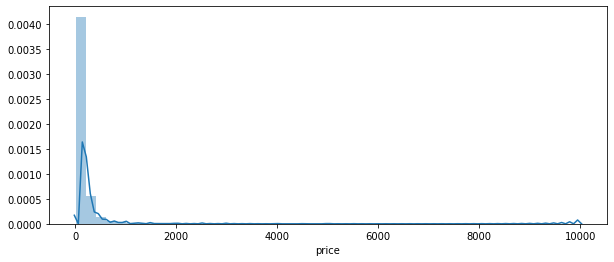

In [435]:
## Visualize the price distribution 
plt.figure(figsize=(10,4))
sns.distplot(eda['price'])
plt.show()

In [436]:
## To get rid of outliers, filtering out prices that are greater than 3 sample standard deviations from the mean
## Normally 3 standard deviations means that any data points outside of this range is outside of the 95% Confidence Interval Level
price_mean = np.mean(eda['price'])
price_std = np.std(eda['price'])
price_cutoff = price_mean + price_std*3

In [437]:
## Get rid of the prices exceeding average + 3*std_dev
eda_viz = eda_viz[eda_viz['price'] < price_cutoff]

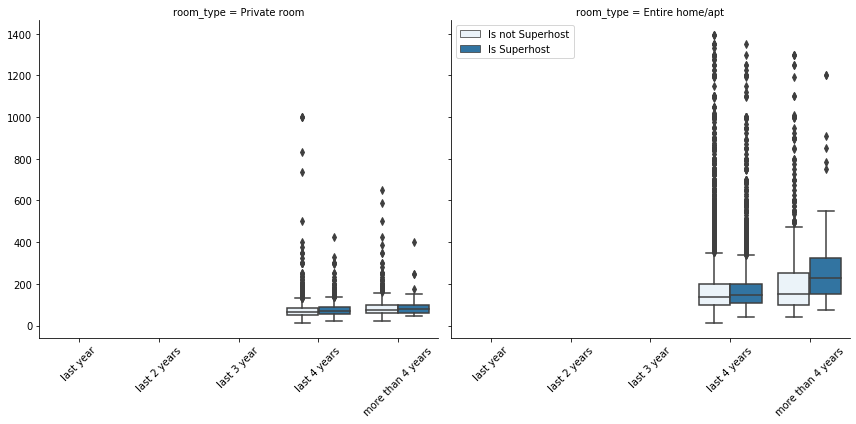

In [438]:
## Visualize the prices in respect to room type and superhost
fgrid = sns.FacetGrid(eda_viz, col='room_type', height=6,)
fgrid.map(sns.boxplot, 'last_review_discrete', 'price', 'host_is_superhost', 
          order=labels, hue_order = [0,1])

for ax in fgrid.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set(xlabel=None, ylabel=None)

l = plt.legend(loc='best')
l.get_texts()[0].set_text('Is not Superhost')
l.get_texts()[1].set_text('Is Superhost')

fgrid.fig.tight_layout(w_pad=1)

# Key Descriptive Analysis Takeaways from this plot

Looking at the boxplots above, it seems that amazingly there hasn't been much reviews over the last 2 years or less. This is probably so because the downloaded data was posted could have been an older data set and subtracting it with today's date (March 4, 2020) may have led to this.

Reviews older than 2 years seems to show that prices do seem to be higher than units with more recent reviews.

Superhosts pricings tends to be higher than non-Superhosts.

# E. Dealing with Missing Values

Before continuing, the NaN (NULL values) or "missing" values needs to be addressed in order to perform any meaningful machine learning models.
The approach to address the missing values will be :
Assess missing values on each column and rows to check if any columns can be dropped and to see if there are any patterns among each rows.
If some missing values have to be filled, strategize on how to fill those missing values.

1. Assessing Missing Values per Column
Assuming price is a feature that we want to retain and possibly use to in our Machine Learning model, rows (i.e.: records) that have missing values in the price column will be removed.

In [439]:
## Assume we want to predict the price feature. 
## If price is the variable we want to predict, then we have to disregard rows that don't have it
## Drop all rows with missing values in the 'price' column
cleaned_df = cleaned_df.dropna(subset=['price'])

Check the ratio of missing values for each column (i.e.: features) data
So this will be # of missing data / # of total data

In [440]:
## Calculating proportion by summing NA values and dividing by length of DF
prop_na = cleaned_df.isna().sum()/len(cleaned_df)
## Filtering out columns with less than 5% NA values to clean up the visualization below
prop_na_05 = prop_na[prop_na > 0.05]
prop_na_05 = prop_na_05.sort_values(0, ascending=True).reset_index()

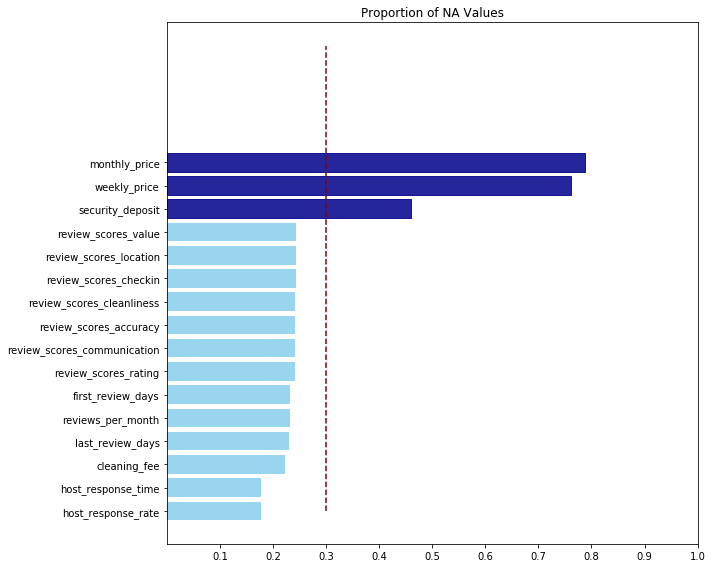

In [441]:
## Plotting proportion of NA values for all columns where more than 5% is missing. 
plt.figure(figsize=(10, 8))

barh = plt.barh(prop_na_05['index'], prop_na_05[0],alpha=0.85, color='skyblue')
for i in range(3):
    i += 1
    barh[-i].set_color('darkblue')

plt.title('Proportion of NA Values')
plt.vlines(x=.3, ymin=0, ymax=20, color='darkred', linestyles='dashed')
plt.xticks(np.arange(.1, 1.01, .1))

plt.tight_layout()

Based on the plot,
monthly price
weekly price
security deposit
variables have more than 30% of their data missing. These will be removed from the data cleaned_df.

In [442]:
## Drop the 3 missing columns identified above from cleaned_df
drop_na_cols = ['monthly_price', 'weekly_price', 'security_deposit']
drop.extend(drop_na_cols)
cleaned_df = cleaned_df.drop(drop_na_cols, axis=1)

In [443]:
## Create a temporary column called "sum_na_row" in cleaned_df that contains the number of NA values per row
cleaned_df['sum_na_row'] = cleaned_df.isna().sum(axis=1)

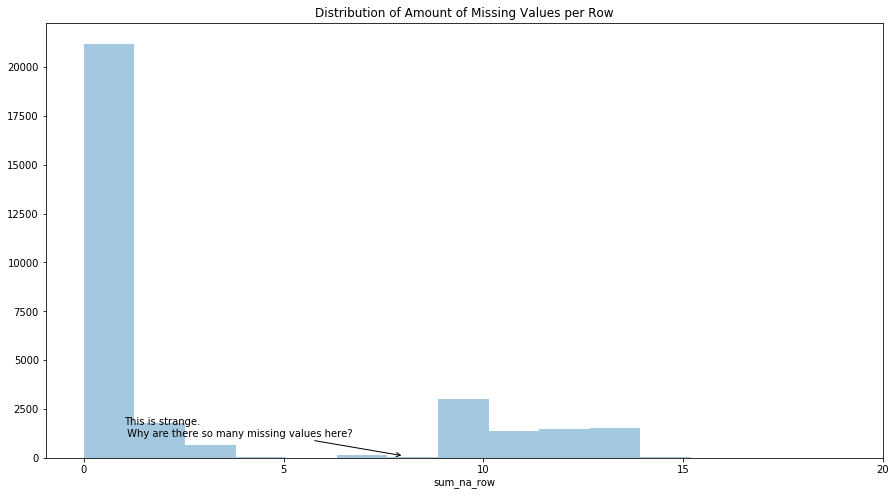

In [444]:
## Use matplotlib or seaborn to plot the distribution of this new column. 

plt.figure(figsize=(15,8))
sns.distplot(cleaned_df['sum_na_row'], bins=15, kde=False)
plt.xticks(np.arange(0, 21, 5))
plt.title('Distribution of Amount of Missing Values per Row')
plt.annotate('This is strange.\n Why are there so many missing values here?',
             xy=(8.0,100),
             xytext=(1,1100),
             arrowprops={'arrowstyle':'->'})
plt.show()

This distribution of missing values looks a little odd.
Look at how few missing values per row we have between 4-9, and a lot of missing values from 0-4, 9-14.
This may be systematically created. Let's investigate if there are specific columns that are consistently empty for these rows.

In [445]:
## Filter cleaned_df for only rows with 10 or more missing values. Store this in a temporary DataFrame
temp = cleaned_df[cleaned_df['sum_na_row'] >= 10]

## Get the names of the columns that contain missing values from this temporary DF
na_cols = temp.columns[temp.isna().any()]

# Check if computation was done correctly and transpose for column readability
temp[na_cols].transpose()

,0,5,8,13,14,18,22,23,29,32,...,31241,31242,31244,31245,31246,31248,31249,31250,31251,31252
host_listings_count,1,1,1,1,1,1,1,3,1,1,...,7,1,2,1,1,1,4,1,1,1
host_total_listings_count,1,1,1,1,1,1,1,3,1,1,...,7,1,2,1,1,1,4,1,1,1
bathrooms,7,1,1.5,1,2,1.5,1,1,1,1,...,1,1,0.5,1,2,1,1,5,1,4
bedrooms,5,1,2,1,1,1,1,1,1,1,...,1,1,1,1,3,1,1,5,2,3
beds,5,1,1,2,1,1,1,2,1,4,...,1,1,2,2,3,1,1,5,2,6
review_scores_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_cleanliness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_checkin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like a huge portion of missing values are coming from review-related features.
NaN missing values related to reviews are most likely missing because these particular listings do not have any reviews. This could be useful information, so those values can be encoded as 0 so they're different from the values that we do have.

Although 0 may be misleading, filling with 0 could be better than simply removing the rows or imputing based on other values to maintain its variance from the units that actually have reviews.

Now the missing values in the review-related features will be filled with '0's.

In [446]:
# Collecting the numerical review-related columns
zero_fill_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
               'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
               'review_scores_value', 'reviews_per_month', 'first_review_days', 'last_review_days']

# 3. Categorical Features with Missing Values
The approach of filling missing values will be :

Fill with mode/most frequent value
Infer their value from other columns
Create a dummy variable

In [447]:
## Isolate all categorical columns (i.e. columns of dtype 'object'), 
## Visualize count or barplots for each column to see how these features are distributed to check for frequent mode features
cat_cols = cleaned_df.select_dtypes(['object']).columns.values

In [448]:
cat_cols

array(['host_response_time', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy', 'last_review_discrete'], dtype=object)

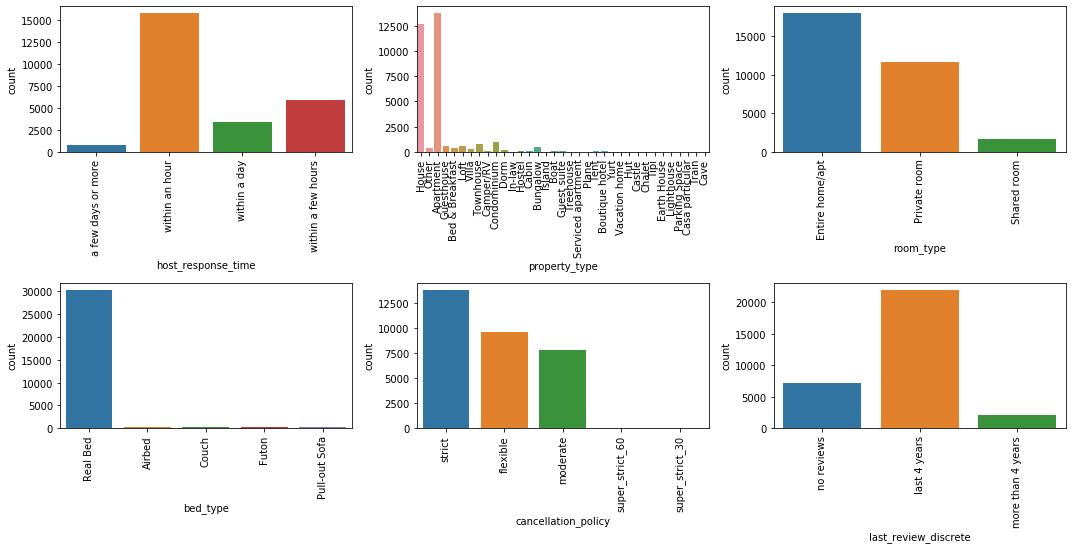

In [449]:
plt.figure(figsize=(15, 10))
i = 1
for col in cat_cols:
    plt.subplot(3, 3, i)
    
    sns.countplot(cleaned_df[col])
    plt.xticks(rotation=90)
    plt.tick_params(labelbottom=True)
    
    i += 1

plt.tight_layout()

Based on the countplots, modes are identifiable easily and thus can be used to fill missing values within each column.
4. Fill other missing values with,
mean
median

In [450]:
# Getting indices or (names list) of columns that still contain missing values
columns_idxs_missing = np.where(cleaned_df.isna().any())[0]

# Getting the names of these columns
cols_missing = cleaned_df.columns[columns_idxs_missing]

# Taking a peek at what's left
cleaned_df[cols_missing].head()

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,reviews_per_month,host_response_rate,cleaning_fee,host_since_days,first_review_days,last_review_days,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified
0,1.0,1.0,7.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.25,200.0,1596.0,NaN,NaN,a few days or more,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,93.0,10.0,10.0,10.0,10.0,...,1.91,1.00,NaN,1708.0,1635.0,1130.0,within an hour,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,...,1.72,1.00,NaN,1407.0,1362.0,1123.0,within an hour,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,3.0,100.0,10.0,10.0,10.0,10.0,...,2.12,1.00,35.0,1475.0,1429.0,1122.0,within an hour,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,93.0,10.0,9.0,10.0,10.0,...,0.18,NaN,5.0,1745.0,1625.0,1613.0,NaN,0.0,1.0,1.0


The rest of these missing values will be filled with the median value.

In [451]:
## Drop the sum_na_row feature we made from cleaned_df since this is not needed any longer
cleaned_df = cleaned_df.drop(['sum_na_row'], axis=1)

In [452]:
## Check for other columns that have not been transformed or examined and fill them with the median values
    
features_accounted_for = np.concatenate([cat_cols,np.array(zero_fill_cols+['price'])])
all_cols = cleaned_df.columns.values

median_fill_cols = np.setdiff1d(all_cols, features_accounted_for)

# III. Train/Test Split
Back to top

Now split the cleaned data into training, testing, and (optionally) validation.

The K-fold cross validation can be implemented as an option. (In normal ML practice, CV should always be used)

In [453]:
## Store cleaned_df without the price column in a variable called X. 
X = cleaned_df.drop('price', axis=1)

## Store cleaned_df['price'] in a variable called y
y = cleaned_df['price']


## Split the data using train_test_split using a train_size of 80% and test size of 20%
## Store all these in the variables below
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [454]:
# Setting this option to None to suppress a warnings **** WHAT IS GOING ONNNNNN????
pd.options.mode.chained_assignment = None

# IV. Prepare for ML 
Back to top

A. Dealing with Missing Data: Final preprocessing for ML models

Instead of using panda's fillna method, sklearn's SimpleImputer estimator method will be used to deal with missing data.

Three SimpleImputer will be fitted on X_train only according to each of our three strategies above. Then, we will use these imputers to transform both our X_train and X_test. As a reminder, this is what we will do...

Fill categorical features stored in cat_cols with their mode/most frequent value
Fill review-related features stored in zero_fill_cols with a constant vaue: 0.
Fill all remaining numerical features stored in median_fill_cols with their median.

1) Imputing the categorical variables.


In [455]:
# impute using a for loop
for col in cat_cols:
    imputer = SimpleImputer(strategy='most_frequent')
    # fit the impute to X_training data
    imputer.fit(X_train[[col]])

    
    # using the transform method to fill NA values with the most frequent value, then updating our DFs
    X_train[col] = imputer.transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])

2) Imputing the numerical variables for both zero_fill_cols and other numerical features.

In [456]:
## Impute the zero_fil_cols features using an imputer with strategy = "constant" and fill_value = 0
for col in zero_fill_cols:
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    imputer.fit(X_train[[col]])
    
    X_train[col] = imputer.transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])

In [457]:
## Impute the median_fill_cols using an imputer with strategy = "median"
for col in median_fill_cols:
    imputer = SimpleImputer(strategy='median')
    imputer.fit(X_train[[col]])
    
    X_train[col] = imputer.transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])

# B. Feature Engineering

Using the cleaned data, new features can be created using existing features through such as calculations and so forth.
e.g.: Features to calcuate the capacity to beds (how many people can sleep on the room's bed?)

In [458]:
## In X_train, create a new feature called "capacity_to_beds" by dividing the "accomodates" feature by "beds"
X_train['capacity_to_beds'] = X_train['accommodates']/X_train['beds']

## Do the same thing for X_test. 
X_test['capacity_to_beds'] = X_test['accommodates']/X_test['beds']

## Check for correct computation
X_train[['accommodates', 'beds','capacity_to_beds']].head()

,accommodates,beds,capacity_to_beds
10369,2.0,1.0,2.00
14048,2.0,1.0,2.00
17542,5.0,4.0,1.25
14560,10.0,5.0,2.00
20904,4.0,1.0,4.00


Since the above feature was created as an example, the column data will be re-assigned as '0's.

In [459]:
## TO DO: Fill infinite values with zero in X_train and X_test. (Hint: use np.where and np.isinf can be helpful)
X_train['capacity_to_beds'] = np.where(np.isinf(X_train['capacity_to_beds']),
                                          0,
                                          X_train['capacity_to_beds'])

X_test['capacity_to_beds'] = np.where(np.isinf(X_test['capacity_to_beds']),
                                          0,
                                          X_test['capacity_to_beds'])

# C. Transform Data

Transforming Numerical Data - Log Transform

Now is a good time to do any numerical data transformations if you haven't done them already.

In case of cleaning_fee, applying a log will make the data points follow the Normal Distribution better and this will aid our ML model later on.

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


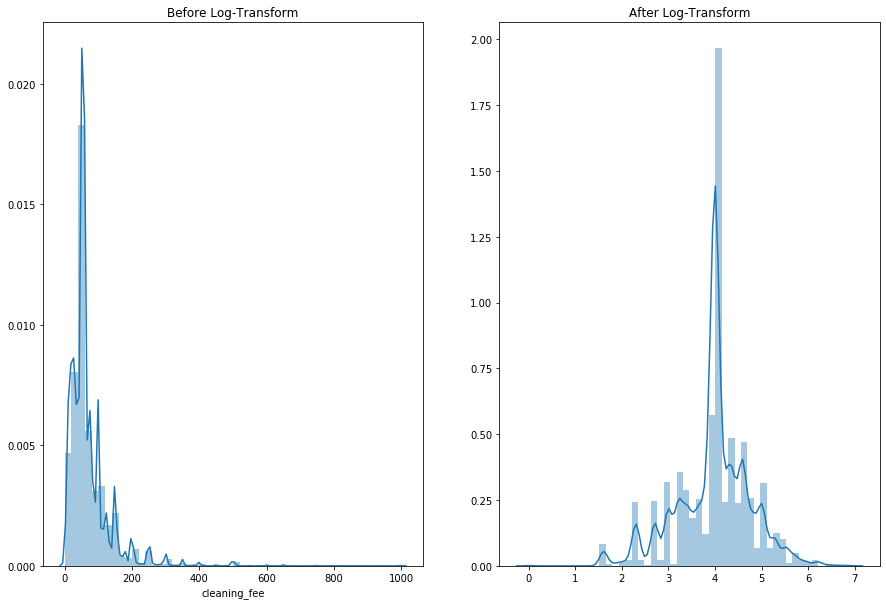

In [461]:
plt.figure(figsize=(15,10)) #********

# Creating plot on the left
plt.subplot(121)
sns.distplot(X_train['cleaning_fee'])
plt.title('Before Log-Transform')

# Creating plot on the right
plt.subplot(122)
log_transform_train = np.where(np.isinf(np.log(X_train['cleaning_fee'])), 0, np.log(X_train['cleaning_fee']))
log_transform_test = np.where(np.isinf(np.log(X_test['cleaning_fee'])), 0, np.log(X_test['cleaning_fee']))
sns.distplot(log_transform_train)
plt.title('After Log-Transform')

plt.show()

In [462]:
## Update the "cleaning_fee" features in X_train and X_test with their log-transformed values
X_train['cleaning_fee'] = log_transform_train
X_test['cleaning_fee'] = log_transform_test

# Transforming Numerical Data - Standardization

Standardization is useful to balance out the numerical values when their units are different (e.g.: some are in their single digits while some are in their millions unit).

In [463]:
temp_df = X_train.select_dtypes(['float', 'int'])

# Gathering binary features
bi_cols = []
for col in temp_df.columns:
    if temp_df[col].nunique() == 2:
        bi_cols.append(col)

In [464]:
## Store all the columns we need to standardize in cols_to_standardize.
cols_to_standardize = np.setdiff1d(temp_df.columns, bi_cols)

In [465]:
## Instantiate the StandardScaler() 
scaler = StandardScaler()
## Fit the scaler to X_train's cols_to_standardize only since binary (0,1) columns do not need to be standardized
scaler.fit(X_train[cols_to_standardize])

## Transform X_train and X_test's cols_to_standardize and update the DataFrames
X_train[cols_to_standardize] = scaler.transform(X_train[cols_to_standardize])
X_test[cols_to_standardize] = scaler.transform(X_test[cols_to_standardize])

# One Hot Encoding the Categorical Data
Convert categorical data into columns using OHE and create dummy columns.

In [466]:
## Check for number of unique values in each categorical columns
print('Unique Values per categorical column : ')
for col in cat_cols:
    print(f'{col}: {X_train[col].nunique()}')

Unique Values per categorical column : 
host_response_time: 4
property_type: 33
room_type: 3
bed_type: 5
cancellation_policy: 5
last_review_discrete: 3


In [467]:
## OHE the categorical column data
for col in cat_cols:
    ## Instantiate the OneHotEncoder 
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    ## Fit ohe to the current column "col" in X_train
    ohe.fit(X_train[[col]])
    
    # This extracts the names of the dummy columns from OHE
    dummy_cols = list(ohe.categories_[0])
    
    # This creates new dummy columns in X_train and X_test that will be filled
    for dummy in dummy_cols:
        X_train[dummy] = 0
        X_test[dummy] = 0
    
    ## Transform the X_train and X_test column "col" and update the dummy_cols created above
    X_train[dummy_cols] = ohe.transform(X_train[[col]])
    X_test[dummy_cols] = ohe.transform(X_test[[col]])

In [468]:
## Drop the original cat_cols from X_train and X_test
X_train = X_train.drop(cat_cols, axis=1)
X_test = X_test.drop(cat_cols, axis=1)

# D. Feature Selection

Reduce the number of features by removing features that have a very high correlation with another feature.

In [469]:
##### THIS PART IS REALLY GOOD AND USEFUL TOOLS. ****•••••****
threshold = 0.8

# Calculating an absolute value correlation matrix
corr_mat = X_train.corr().abs()

# Getting upper triangle of this matrix only
upper = pd.DataFrame(np.triu(corr_mat, k=1), columns=X_train.columns)

# Select columns with correlations above threshold
corr_col_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print(f'There are {len(corr_col_drop)} columns to remove out of {len(X_train.columns)}.')

There are 31 columns to remove out of 208.


In [470]:
X_train = X_train.drop(corr_col_drop, axis=1)
X_test = X_test.drop(corr_col_drop, axis=1)

# V. Applying Machine Learning Models to the Data 
Back to top

For the cleaned data, three Machine Learning models will be used to predict the Airbnb Los Angeles prices :
Random Forest
Gradient Boosted Regression
Support Vector Machine (Regression)
For simplicity, cross validation was not performed before running the model.

In [471]:
#### THIS PART OF THE CODE IS VERY USFUL AS WELL.****••••ªªªªºººº––≠≠≠≠≠
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [472]:
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

models = [rf, gbr, svr]

# VI. Model Selection 
Back to top

After running the model to predict the y variable (in this case, price), several metrics can be used to evaluate how close the prediction was and how robust the models are.

In [473]:
results = []

for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    
    metrics = {}
    metrics['model'] = model.__class__.__name__
    metrics['mse'] = mse
    metrics['mae'] = mae
    results.append(metrics)

# Apply the fitted model to the real_testX data to predict y_preds1
Since the real_testX has 1 record and to test the accuracy of the model, the average change of prices in y_preds1 will be evaluated in respect to real_testy price.

In [475]:
pd.set_option('display.float_format', lambda x: '%7.2f' % x)


pd.DataFrame(results, index=np.arange(len(results))).round(50)

,model,mse,mae
0,RandomForestRegressor,92941.70,71.33
1,GradientBoostingRegressor,90306.72,72.67
2,SVR,201021.78,87.13


Based on the model, it seems the GBR has the lowest Mean Squared Error and Mean Absolute Error, which means it has the least variability among the three models.
Therefore, a strong case can be made that GBR is the best out of the 3.
However, since the model did not perform a cross validation, the results could change slightly.
Another step to take further to improve the model would be to tune the hyper parameters for each Random Forest, Gradient Boosted Regression, and Support Vector Machine models. This step will be skipped for this notebook.
This reaches the end of the notebook. Thanks for reading up to this point and I hope this helps newly beginning data science enthusiasts like myself get started in diving into data.
Good luck and let me know if there were any ambiguities, errors, or hard-to-understand sections within the notebook.